In [1]:
%%time
#for data handling
import pandas as pd
import numpy as np
from scipy import * 

#for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

Wall time: 5.66 s


In [2]:
# Styling:
''' Use Pallete > 2 for jointplot or pair plot '''
custom_palet1 = ['#111d5e', '#1E6262', '#E50058', '#FF740F', '#F64662']
custom_palet2 = ['#11364A', '#E84545', '#3F7B70', '#ffbd69', '#ffc93c']
custom_palet3 = ['#11364A', '#E84545']
custom_palet4 = ['#3F7B70', '#F64662']
custom_palet5 = ["#868686", "#477ccd"]

plt.style.use('ggplot')

In [3]:
%%time
# import dataset
df = pd.read_csv('dataset/heart.csv')
df.head(3)

Wall time: 9 ms


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
%%time
df.describe()

Wall time: 52 ms


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
%%time
df.isnull().sum().sum()

Wall time: 2 ms


0

In [6]:
print(
    f'(The dataset contain, {df.shape[1]} features and {df.shape[0]} number of Observations.\n and the features are : {df.columns.to_list()} '
)

(The dataset contain, 14 features and 303 number of Observations.
 and the features are : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] 


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# Exploratory Data Analysis
---

In [8]:
# separate the dataframe to keep the original data
data = df.copy()
# renaming columns label to understand better
data.columns = [
    'Age', 'Gender', 'Chest_Pain', 'Rest_Blood_Pressure', 'Cholestrol', 'Fasting_Blood_Sugar',
    'Rest_ECG', 'Max_Heart_Rate','Exercise_Induced_Angina', 'St_Depression', 'Slope',
    'Number_Major_Vessel', 'Thallium_Stress_Test', 'Condition']

In [9]:
#map dataset for better understanding
data['Gender'] = data['Gender'].map({0: 'Female ', 1: 'Male'})

data['Chest_Pain'] = data['Chest_Pain'].map(
    {1: 'Typical Angina', 2: 'Atypical Angina',
     3: 'Non-Anginal Pain', 4: 'Asymptomatic'})

data['Fasting_Blood_Sugar'] = data['Fasting_Blood_Sugar'].map({0: 'low ', 1: 'high'})

data['Rest_ECG'] = data['Rest_ECG'].map({0: 'Normal ', 1: ' ST-T_wave_abnormality', 2: 'left_ventricular_hypertrophy'})

data['Exercise_Induced_Angina'] = data['Exercise_Induced_Angina'].map({0: 'No', 1: 'Yes'})

data['Slope'] = data['Slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

data['Number_Major_Vessel'] = data['Number_Major_Vessel'].map({0:'upsloping',1:'flat',2:'downsloping'})

data['Thallium_Stress_Test'] = data['Thallium_Stress_Test'].map({0:'upsloping',1:'flat',2:'downsloping'})

data['Condition'] = data['Condition'].map({0: 'Less_Chance ', 1: 'More_Chances'})

In [10]:
# Masks for easier selection in future:
categorical = [i for i in data.loc[:,data.nunique()<=10]]
continuous = [i for i in data.loc[:,data.nunique()>=10]]

In [11]:
def ctg_dist(data, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    fig.patch.set_facecolor('#e8e8e6')
    axes = axes.flatten()

    for i, j in zip(data[cols].columns, axes):
        sns.countplot(x=i,
                    data=data,
                    palette=custom_palet2,
                    hue=hue,
                    ax=j,
                    order=data[i].value_counts().index)
        j.tick_params(labelrotation=10)        
        
        total = float(len(data[i]))
        
        j.set_title(f'Distribution of {str(i).capitalize()} ')
           
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2., height + 2,'{:1.2f}%'.format((height / total) * 100), ha='center')
        
        plt.style.use('seaborn-dark-palette')
        plt.tight_layout()

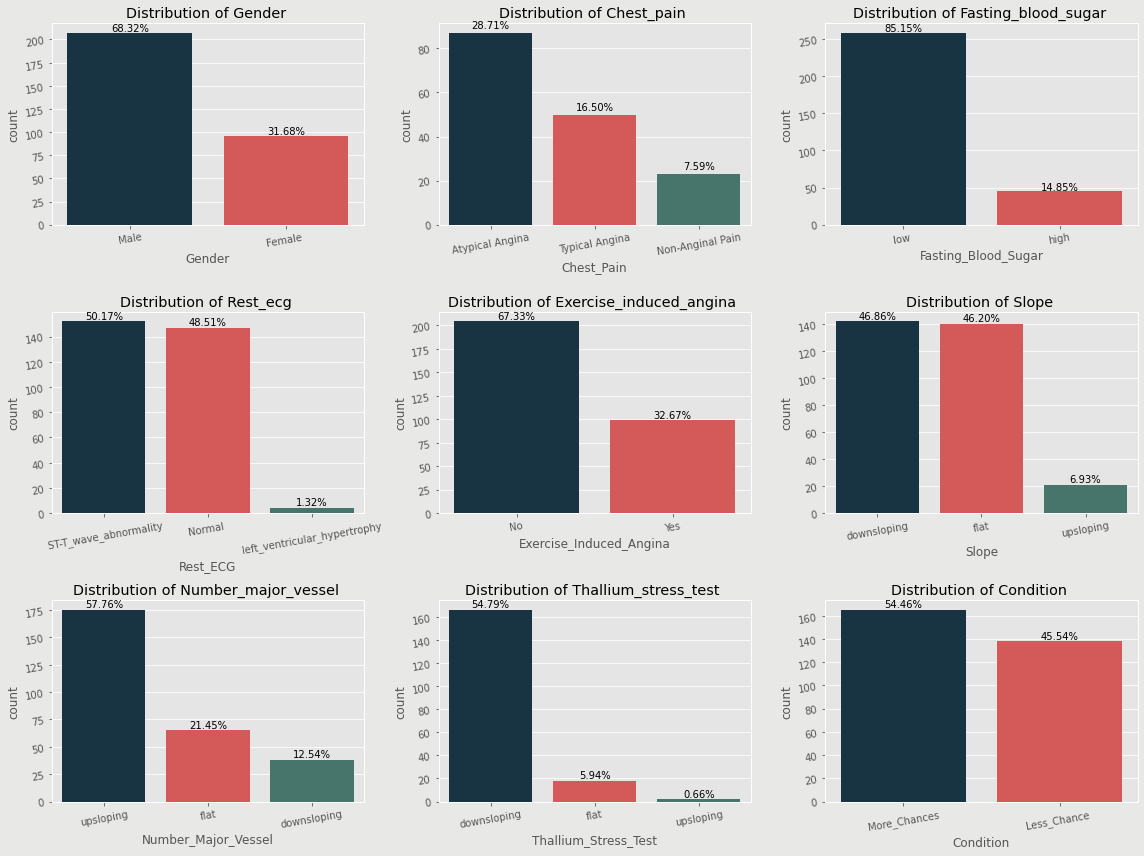

In [12]:
ctg_dist(data, categorical) 

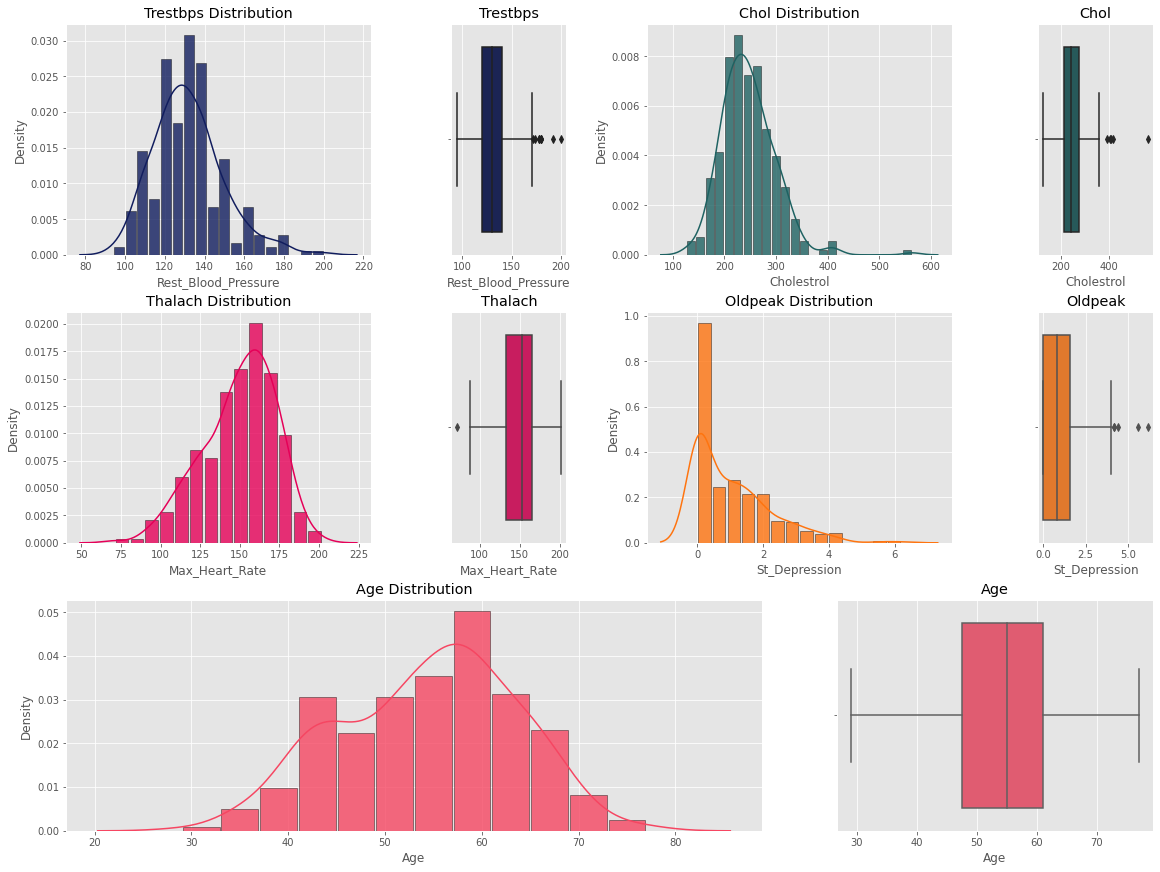

In [13]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')

sns.distplot(data[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=custom_palet1[0])

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Trestbps')

sns.boxplot(data[continuous[1]], orient="h", color=custom_palet1[0])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')

sns.distplot(data[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=custom_palet1[1])

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')

sns.boxplot(data[continuous[2]], orient='h', color=custom_palet1[1])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Thalach Distribution')

sns.distplot(data[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=custom_palet1[2])

ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Thalach')

sns.boxplot(data[continuous[3]], orient='h', color=custom_palet1[2])

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')

sns.distplot(data[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=custom_palet1[3])

ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak')

sns.boxplot(data[continuous[4]], orient='h', color=custom_palet1[3])

ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')

sns.distplot(data[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=custom_palet1[4])

ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age')

sns.boxplot(data[continuous[0]], orient='h', color=custom_palet1[4])

plt.show()

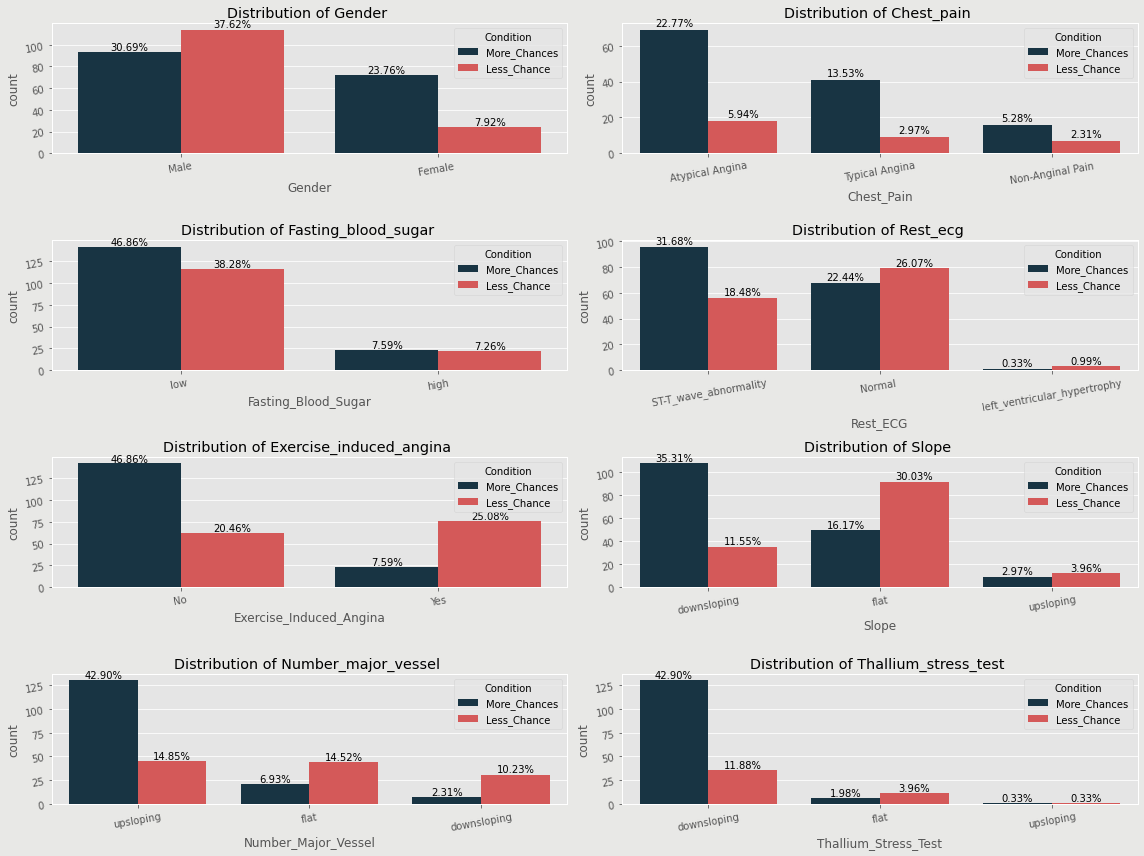

In [14]:
ctg_dist(data, categorical[:-1], 'Condition', 4, 2)

<Figure size 1152x720 with 0 Axes>

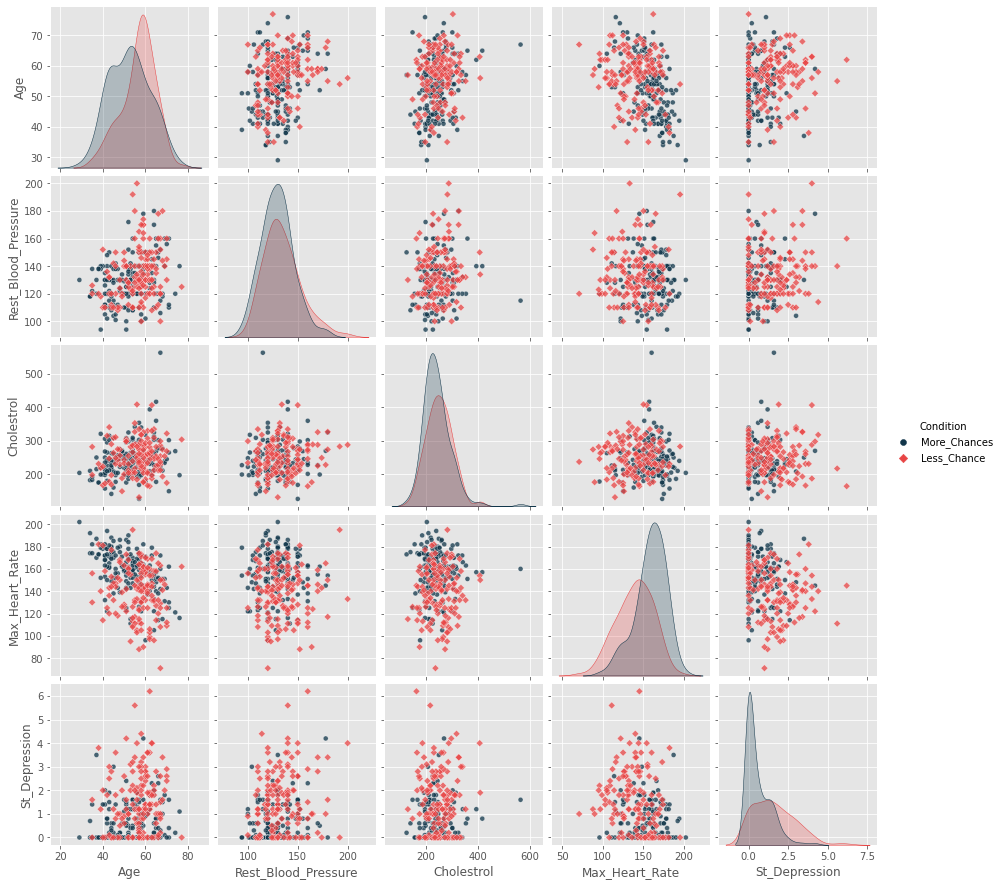

In [28]:
# Numeric data vs each other and condition:
plt.figure(figsize=(16, 10))
sns.pairplot(
    data[['Age', 'Gender', 'Chest_Pain', 'Rest_Blood_Pressure', 'Cholestrol', 'Fasting_Blood_Sugar',
    'Rest_ECG', 'Max_Heart_Rate','Exercise_Induced_Angina', 'St_Depression', 'Slope',
    'Number_Major_Vessel', 'Thallium_Stress_Test', 'Condition']],
     hue='Condition',
     markers=['o','D'],
     palette= custom_palet3,
     plot_kws=dict(s=25, alpha=0.75, ci=None))

# Modelling
---

In [16]:
# For fearture extractin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for model evaluation
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score



In [17]:
dataset = df.values
feature,target = dataset[:,1:-1], dataset [:, -1]


The standard train test split. Just take a few part of dataset for training and testing while kfold or cross validation take the whole dataset. Quite confusing. for example:
> we have a dataset with total of 10 rows. **Standard split** ( if we split 0.30 for test), just take 7 of data for train [ let say from rows 1~7]. But it used rows 8~10 for test. While **k fold** will change the train and test size depend on how many iteration we set. For example we set 3 iteration with 0.30 test size; The first iteration will take rows 1~7 for train and the rest for test, second iteartion will use row 4~10 for train and row 1~3 for test, and *at the last iteration will take row 4~6 for testing and the rest for Training*. So The model is evaluated by the average score of each iteration. So, to evalute the model performance, using kfold/ cross validation is always better than just simple train_test_split.


---
## Here we will evaluating different between common train_test split and kfold/cross validation. 
---



In [18]:
x_train,x_test, y_train, y_test = train_test_split(feature, target, random_state=42, test_size=0.3)

In [19]:
def thresholding(y_pred):
        
    ''' This method will transform The continuous list into discrete 0 and 1 based on the mean value '''

    data = np.array(y_pred)
    mean = data.mean()
    new_pred = []
    for y in data:
        if y >= mean:
            y = 1
            new_pred.append(y)
        elif y < mean:
            y = 0
            new_pred.append(y)
            
    return new_pred


def get_Score(model_list, x_train, x_test, y_train, y_test):
    result = []
    for model in model_list:
        model.fit(x_train,y_train)
        gen_score = model.score(x_test,y_test)
        y_pred = thresholding(model.predict(x_test))
        
        score_r2 = r2_score(y_test,y_pred)
        mae_score = mean_absolute_error(y_test,y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr,tpr)
        score_f1 = f1_score(y_test, y_pred)
        score_jaccard = jaccard_score(y_test, y_pred)
        
        result.append([str(model),gen_score,score_r2,mae_score, auc_score, score_f1,score_jaccard])
        
    return result

In [20]:
%%time
list_model = [
    SVC(),
    LinearRegression(),
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(class_weight="balanced"),
    RandomForestClassifier(n_estimators=45)
    ]


Wall time: 998 µs


In [21]:
eva =pd.DataFrame(get_Score(list_model, x_train, x_test, y_train, y_test), \
 columns=['Model', 'Score', 'R2_Score','MAE_Score','AUC_Score','F1_Score','Jaccard Similarity'])
eva

,Model,Score,R2_Score,MAE_Score,AUC_Score,F1_Score,Jaccard Similarity
0,SVC(),0.681319,-0.287317,0.318681,0.657317,0.756303,0.608108
1,LinearRegression(),0.399124,0.245366,0.186813,0.810244,0.831683,0.711864
2,LogisticRegression(),0.813187,0.245366,0.186813,0.810244,0.831683,0.711864
3,GaussianNB(),0.813187,0.245366,0.186813,0.816829,0.821053,0.696429
4,DecisionTreeClassifier(class_weight='balanced'),0.791209,0.156585,0.208791,0.788049,0.811881,0.683333
5,RandomForestClassifier(n_estimators=45),0.835165,0.334146,0.164835,0.832439,0.851485,0.741379


## Here is using K Fold

In [22]:
NSPLIT = 3
kf = KFold(n_splits=NSPLIT, random_state=32, shuffle=True)

In [23]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

def scoring(model_list, feature):
    output = [[model] + [get_score(model,feature[train_index], feature[test_index],target[train_index],target[test_index]) for train_index, test_index in kf.split(feature) ] for model in model_list]
    return output

In [24]:
kFold_score = pd.DataFrame(scoring(list_model, feature), columns= ['Model', '1st_iter', '2nd_iter', '3rd_iter'])
for i, row in kFold_score.iterrows():
    kFold_score.loc[i, 'Everage Score'] = (row['1st_iter']+row['2nd_iter']+row['3rd_iter'])/NSPLIT

kFold_score.head()

,Model,1st_iter,2nd_iter,3rd_iter,Everage Score
0,SVC(),0.693069,0.683168,0.584158,0.653465
1,LinearRegression(),0.514801,0.422139,0.419191,0.452043
2,LogisticRegression(),0.851485,0.811881,0.801980,0.821782
3,GaussianNB(),0.821782,0.801980,0.801980,0.808581
4,DecisionTreeClassifier(class_weight='balanced'),0.782178,0.693069,0.693069,0.722772


## Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:

for model in list_model:
    print(cross_val_score(model, feature, target))

[0.60655738 0.60655738 0.73770492 0.66666667 0.58333333]
[0.         0.         0.32727711 0.         0.        ]
[0.81967213 0.86885246 0.85245902 0.86666667 0.75      ]
[0.80327869 0.90163934 0.80327869 0.81666667 0.71666667]
[0.75409836 0.80327869 0.73770492 0.71666667 0.73333333]
[0.83606557 0.8852459  0.81967213 0.85       0.73333333]


and finally..

---
# Conclusion
---


If we about to evaluate the model based on the different evaluation metrics:
> **Random Forest Classifier** seem to give the best performance (in term of accuracy)

But by kfold:
> **Logistic regression** seem to be top